In [ ]:
#Basic 'Hello world' code in tensorflow.
import tensorflow as tf

a = tf.constant('Hello world!')

sess = tf.Session()
print(sess.run(a))

In [9]:
#Basic constant operations

a = tf.constant(9)
b = tf.constant(18)

with tf.Session() as sess:
    print("a: %i" % sess.run(a), "b: %i" % sess.run(b))
    print("Addition = %i" % sess.run(a+b))
    print("Multiplication = %i" % sess.run(a*b))

a: 9 b: 18
Addition = 27
Multiplication = 162


Epoch: 0050 cost= 0.080236942 w= 0.2816453 b= 0.5708887
Epoch: 0100 cost= 0.079859585 w= 0.27973893 b= 0.5846032
Epoch: 0150 cost= 0.079525948 w= 0.2779459 b= 0.5975021
Epoch: 0200 cost= 0.079230957 w= 0.27625942 b= 0.6096344
Epoch: 0250 cost= 0.078970201 w= 0.27467355 b= 0.6210427
Epoch: 0300 cost= 0.078739673 w= 0.27318218 b= 0.6317722
Epoch: 0350 cost= 0.078535885 w= 0.2717793 b= 0.64186364
Epoch: 0400 cost= 0.078355707 w= 0.27045992 b= 0.6513557
Epoch: 0450 cost= 0.078196429 w= 0.26921883 b= 0.66028357
Epoch: 0500 cost= 0.078055643 w= 0.26805174 b= 0.6686798
Epoch: 0550 cost= 0.077931240 w= 0.266954 b= 0.6765766
Epoch: 0600 cost= 0.077821255 w= 0.26592153 b= 0.6840038
Epoch: 0650 cost= 0.077724040 w= 0.26495054 b= 0.6909896
Epoch: 0700 cost= 0.077638127 w= 0.26403716 b= 0.69756025
Epoch: 0750 cost= 0.077562205 w= 0.2631782 b= 0.70373964
Epoch: 0800 cost= 0.077495120 w= 0.26237017 b= 0.70955247
Epoch: 0850 cost= 0.077435829 w= 0.26161033 b= 0.7150193
Epoch: 0900 cost= 0.077383459 w=

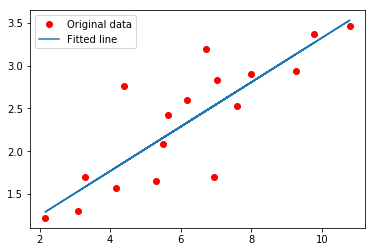

In [134]:
#Linear Regression
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

rng = np.random

#Parameters
learning_rate = 0.01
training_rate = 1000
display_step = 50

#Training data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0] #Sample size 

#tf Graph Input
X = tf.placeholder("float") #Tells the function to hold "float" data type
Y = tf.placeholder("float")

#Set model weights
w = tf.Variable(rng.randn(), name = "Weight")
b = tf.Variable(rng.randn(), name = "Bias")

#Construct a linear model
pred = tf.add(tf.multiply(X, w), b)

#Obtain the mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2*n_samples)
#Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Initialize the variables i.e assign their default values
init = tf.global_variables_initializer()

#Training process
with tf.Session() as sess:
    sess.run(init)
    
    #Fit the training data
    for epoch in range(training_rate):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y: y})
            
              #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "w=", sess.run(w), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "w=", sess.run(w), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(w) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

# tf.placeholder tutorial

In [115]:
#How tf.placeholder works

#Step1 = Create some random data.
random = np.random.rand(1024, 1024)
random

array([[0.64362068, 0.73917262, 0.24015764, ..., 0.75894075, 0.60269227,
        0.3616089 ],
       [0.56530095, 0.81982364, 0.78980013, ..., 0.26451315, 0.22896174,
        0.46397421],
       [0.99260702, 0.43394536, 0.34528508, ..., 0.75144199, 0.72271508,
        0.85004985],
       ...,
       [0.65561164, 0.82617569, 0.68421055, ..., 0.75199478, 0.40190559,
        0.8205145 ],
       [0.08923553, 0.48669883, 0.54397451, ..., 0.16634399, 0.78472878,
        0.44613684],
       [0.18504047, 0.40014466, 0.42263726, ..., 0.28679688, 0.18695991,
        0.81806317]])

In [117]:
#Start a tensorflow session
sess = tf.Session()
#Define the nature of the placeholder
e = tf.placeholder(tf.float32, shape = (1024, 1024)) 
#Feed the data in the form of feed_dict method.
print(sess.run(e, feed_dict={e: random}))

[[0.64362067 0.73917264 0.24015763 ... 0.75894076 0.60269225 0.3616089 ]
 [0.56530094 0.8198236  0.7898001  ... 0.26451316 0.22896174 0.4639742 ]
 [0.992607   0.43394536 0.3452851  ... 0.751442   0.7227151  0.85004985]
 ...
 [0.65561163 0.8261757  0.68421054 ... 0.7519948  0.4019056  0.8205145 ]
 [0.08923553 0.48669884 0.5439745  ... 0.16634399 0.78472877 0.44613683]
 [0.18504047 0.40014467 0.42263725 ... 0.2867969  0.1869599  0.81806314]]
